###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018  by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

###### Translated by Huizhe Di @ SCSIO

# 二维声学有限差分建模代码的数值稳定性、频散和各向异性


与一维声学有限差分建模代码类似, 我们必须研究二维数值格式的稳定性和频散. 此外，数值频散在二维情况下显示出一种各向异性的行为.

让我们从CFL稳定性准则开始...

## 二维声学有限差分建模代码的CFL稳定性准则


对于一维代码, 时间步长的最大值 $dt$ 由 Courant-Friedrichs-Lewy (CFL) 准则限制:

\begin{equation}
dt \le \frac{dx}{\zeta v_{max}}, \nonumber
\end{equation}

这里 $dx$ 代表空间网格点的间距，$v_{max}$ 代表最大的P波速度. 系数 $\zeta$ 依赖于使用的有限差分算子, 维度和数值方案.

对于 [一维情况](http://nbviewer.jupyter.org/github/daniel-koehn/Theory-of-seismic-waves-II/blob/master/04_FD_stability_dispersion/1_fd_stability_dispersion.ipynb), 我们估计系数 $\zeta$ 通过冯·诺伊曼分析, 从二维声学波动方程的有限差分近似开始

\begin{equation}
 \frac{p_{j,l}^{n+1} - 2 p_{j,l}^n + p_{j,l}^{n-1}}{\mathrm{d}t^2} \ = \ vp_{j,l}^2\biggl(\frac{p_{j,l+1}^{n} - 2 p_{j,l}^n + p_{j,l-1}^{n}}{\mathrm{d}x^2} + \frac{p_{j+1,l}^{n} - 2 p_{j,l}^n + p_{j-1,l}^{n}}{\mathrm{d}z^2}\biggr),
\end{equation}

并假定谐波平面波解为压力波场的形式:

\begin{equation}
p = exp(i(k_x x + k_z z -\omega t)),\nonumber
\end{equation}

和 $i^2=-1$, 波数 $(k_x, k_z)$ 在 x-/z-方向, 和圆频率 $\omega$. 使用规则网格

$dx = dz = dh,$

离散空间坐标

$x_j = j dh,$

$z_l = l dh,$

和时间

$t_n = n dt.$

我们可以计算公式(1)中离散位置和离散时间的离散平面波解:  

\begin{align}
p_{j,l}^{n+1} &= exp(-i\omega dt)\; p_{j,l}^{n},\\
p_{j,l}^{n-1} &= exp(i\omega dt)\; p_{j,l}^{n},\\
p_{j+1,l}^{n} &= exp(ik_x dh)\; p_{j,l}^{n},\\
p_{j-1,l}^{n} &= exp(-ik_x dh)\; p_{j,l}^{n},\\
p_{j,l+1}^{n} &= exp(ik_z dh)\; p_{j,l}^{n},\\
p_{j,l-1}^{n} &= exp(-ik_z dh)\; p_{j,l}^{n},\\
\end{align}

把等式 (2) - (7) 插入到等式 (1), 除以 $p_{j,l}^{n}$ 并使用定义: 

\begin{equation}
\cos(x) = \frac{exp(ix) + exp(-ix)}{2},\nonumber
\end{equation}

产生:

\begin{equation}
cos(\omega dt) - 1 = vp_{j,l}^2 \frac{dt^2}{dh^2}\biggl(\{cos(k_x dh) - 1\} + \{cos(k_z dh) - 1\}\biggr).\nonumber
\end{equation}

一些进一步的重排和两边除以2，就得到:

\begin{equation}
\frac{1 - cos(\omega dt)}{2} = vp_{j,l}^2 \frac{dt^2}{dh^2}\biggl(\frac{1 - cos(k_x dh)}{2} + \frac{1 - cos(k_z dh)}{2}\biggr).\nonumber
\end{equation}

利用关系 

\begin{equation}
sin^2\biggl(\frac{x}{2}\biggr) = \frac{1-cos(x)}{2}, \nonumber
\end{equation}

我们得到: 

\begin{equation}
sin^2\biggl(\frac{\omega dt}{2}\biggr) = vp_{j,l}^2 \frac{dt^2}{dh^2}\biggl(sin^2\biggl(\frac{k_x dh}{2}\biggr)+sin^2\biggl(\frac{k_z dh}{2}\biggr)\biggr). \nonumber
\end{equation}

两边同时取平方根就得到了

\begin{equation}
sin\biggl(\frac{\omega dt}{2}\biggr) = vp_{j,l} \frac{dt}{dh}\sqrt{sin^2\biggl(\frac{k_x dh}{2}\biggr)+sin^2\biggl(\frac{k_z dh}{2}\biggr)}.
\end{equation}

这个结果表明，如果库朗数

\begin{equation}
\epsilon = vp_{j,l} \frac{dt}{dh} \nonumber
\end{equation}

大于 $1/\sqrt{2}$, 你只能得到虚解, 而实部为零(想想为什么). 因此，当违反以下CFL准则时，数值格式变得不稳定

\begin{equation}
\epsilon = vp_{j,l} \frac{dt}{dh} \le \frac{1}{\sqrt{2}} \nonumber
\end{equation}

重新排列到时间步长 dt, 假设我们已经定义了空间网格点距离 dh 并且代替 $vp_{j,l}$ 通过最大P波速度在有限差分模型 $v_{max}$, 得到 

\begin{equation}
dt  \le \frac{dh}{\sqrt{2}v_{max}}. \nonumber
\end{equation}

因此, 系数 $\zeta$ 在一般的CFL准则中

\begin{equation}
dt  \le \frac{dh}{\zeta vp_j}, \nonumber
\end{equation}

二维声学波动方程的有限差分解的时间/空间3点算子近似二阶导数为 $\zeta = \sqrt{2}$. 

让我们检查一下这个结果是否正确:

In [1]:
# Import Libraries 
# ----------------
import numpy as np
from numba import jit
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Definition of modelling parameters
# ----------------------------------
xmax = 5000.0 # maximum spatial extension of the 1D model in x-direction (m)
zmax = xmax   # maximum spatial extension of the 1D model in z-direction (m)
dx   = 10.0   # grid point distance in x-direction (m)
dz   = dx     # grid point distance in z-direction (m)

tmax = 0.8    # maximum recording time of the seismogram (s)
dt   = 0.0010 # time step

vp0  = 3000.  # P-wave speed in medium (m/s)

# acquisition geometry
xr = 2000.0   # x-receiver position (m)
zr = xr       # z-receiver position (m)

xsrc = 2500.0 # x-source position (m)
zsrc = xsrc   # z-source position (m)

f0   = 20. # dominant frequency of the source (Hz)
t0   = 4. / f0 # source time shift (s)

In [3]:
# FD_2D_acoustic code with JIT optimization
# -----------------------------------------
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def FD_2D_acoustic_JIT(dt,dx,dz,f0):        
    
    # define model discretization
    # ---------------------------

    nx = (int)(xmax/dx) # number of grid points in x-direction
    print('nx = ',nx)

    nz = (int)(zmax/dz) # number of grid points in x-direction
    print('nz = ',nz)

    nt = (int)(tmax/dt) # maximum number of time steps            
    print('nt = ',nt)

    ir = (int)(xr/dx)      # receiver location in grid in x-direction    
    jr = (int)(zr/dz)      # receiver location in grid in z-direction

    isrc = (int)(xsrc/dx)  # source location in grid in x-direction
    jsrc = (int)(zsrc/dz)  # source location in grid in x-direction

    # Source time function (Gaussian)
    # -------------------------------
    src  = np.zeros(nt + 1)
    time = np.linspace(0 * dt, nt * dt, nt)

    # 1st derivative of a Gaussian
    src  = -2. * (time - t0) * (f0 ** 2) * (np.exp(- (f0 ** 2) * (time - t0) ** 2))

    # Analytical solution
    # -------------------
    G    = time * 0.

    # Initialize coordinates
    # ----------------------
    x    = np.arange(nx)
    x    = x * dx       # coordinates in x-direction (m)

    z    = np.arange(nz)
    z    = z * dz       # coordinates in z-direction (m)

    # calculate source-receiver distance
    r = np.sqrt((x[ir] - x[isrc])**2 + (z[jr] - z[jsrc])**2)

    for it in range(nt): # Calculate Green's function (Heaviside function)
        if (time[it] - r / vp0) >= 0:
            G[it] = 1. / (2 * np.pi * vp0**2) * (1. / np.sqrt(time[it]**2 - (r/vp0)**2))
    Gc   = np.convolve(G, src * dt)
    Gc   = Gc[0:nt]

    # Initialize model (assume homogeneous model)
    # -------------------------------------------
    vp    = np.zeros((nx,nz))
    vp2    = np.zeros((nx,nz))

    vp  = vp + vp0       # initialize wave velocity in model
    vp2 = vp**2
    
    # Initialize empty pressure arrays
    # --------------------------------
    p    = np.zeros((nx,nz)) # p at time n (now)
    pold = np.zeros((nx,nz)) # p at time n-1 (past)
    pnew = np.zeros((nx,nz)) # p at time n+1 (present)
    d2px = np.zeros((nx,nz)) # 2nd spatial x-derivative of p
    d2pz = np.zeros((nx,nz)) # 2nd spatial z-derivative of p

    # Initialize empty seismogram
    # ---------------------------
    seis = np.zeros(nt) 
    
    # Calculate Partial Derivatives
    # -----------------------------
    for it in range(nt):
    
        # FD approximation of spatial derivative by 3 point operator
        for i in range(1, nx - 1):
            for j in range(1, nz - 1):
                
                d2px[i,j] = (p[i + 1,j] - 2 * p[i,j] + p[i - 1,j]) / dx**2                
                d2pz[i,j] = (p[i,j + 1] - 2 * p[i,j] + p[i,j - 1]) / dz**2

        # Time Extrapolation
        # ------------------
        pnew = 2 * p - pold + vp2 * dt**2 * (d2px + d2pz)

        # Add Source Term at isrc
        # -----------------------
        # Absolute pressure w.r.t analytical solution
        pnew[isrc,jsrc] = pnew[isrc,jsrc] + src[it] / (dx * dz) * dt ** 2
                
        # Remap Time Levels
        # -----------------
        pold, p = p, pnew
    
        # Output of Seismogram
        # -----------------
        seis[it] = p[ir,jr]        
        
    return time, seis, Gc, p     # return last pressure wave field snapshot

为了将结果的建模和可视化分开，我们引入了以下绘图函数:

In [4]:
# Compare FD Seismogram with analytical solution
# ---------------------------------------------- 
def plot_seis(time,seis_FD,seis_analy):     
    
    # Define figure size
    rcParams['figure.figsize'] = 12, 5
    
    plt.plot(time, seis_FD, 'b-',lw=3,label="FD solution") # plot FD seismogram
    plt.plot(time, seis_analy,'r--',lw=3,label="Analytical solution") # plot analytical solution
    
    plt.xlim(time[0], time[-1])
    
    plt.title('Seismogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    
    plt.show() 

nx =  500
nz =  500
nt =  339
CPU times: user 326 ms, sys: 39.8 ms, total: 366 ms
Wall time: 366 ms


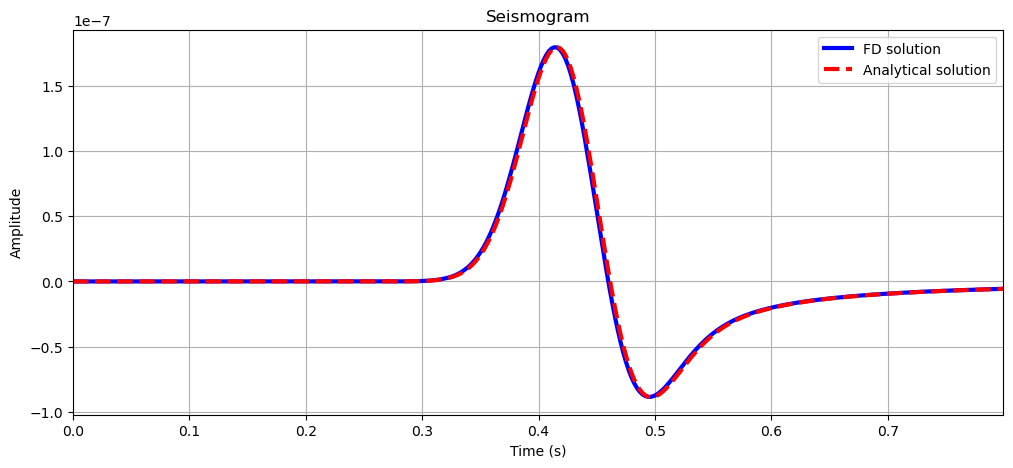

In [13]:
dx   = 10.0   # grid point distance in x-direction (m)
dz   = dx     # grid point distance in z-direction (m)
f0   = 20     # centre frequency of the source wavelet (Hz)

# define 
zeta = np.sqrt(2)

# calculate dt according to the CFL-criterion
dt = dx / (zeta * vp0)

%time time, seis_FD, seis_analy, p = FD_2D_acoustic_JIT(dt,dx,dz,f0)
plot_seis(time,seis_FD,seis_analy)

## 网格数值频散

虽然上述有限差分的解是稳定的，但与解析解相比存在一定的数值频散。网格点的间距 $dx = 10\; m$, P波速度 $vp = 3000\; m/s$ 和最大频率 $f_{max} \approx 2*f_0 = 40\; Hz$ 导致 ...

In [14]:
fmax = 2 * f0 
N_lam = vp0 / (dx * fmax)
print("N_lam = ",N_lam)

N_lam =  7.5


$N_\lambda = 7.5$ 每最小波长的网格点. 让我们把它增加至 $N_\lambda = 12$, 会导致 ...

nx =  800
nz =  800
nt =  543
CPU times: user 1.25 s, sys: 181 ms, total: 1.43 s
Wall time: 1.43 s


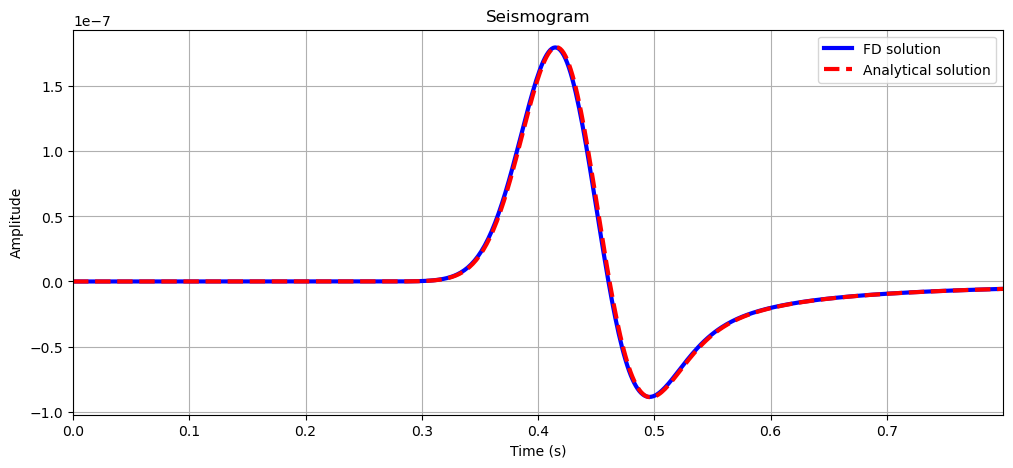

In [15]:
N_lam = 12 
dx   = vp0 / (N_lam * fmax)
dz   = dx     # grid point distance in z-direction (m)
f0   = 20     # centre frequency of the source wavelet (Hz)

# define 
zeta = np.sqrt(2)

# calculate dt according to the CFL-criterion
dt = dx / (zeta * vp0)

%time time, seis_FD, seis_analy, p = FD_2D_acoustic_JIT(dt,dx,dz,f0)
plot_seis(time,seis_FD,seis_analy)

... 用有限差分解对二维分析进行了改进拟合.

## 数值各向异性

相较于一维声学情况, 数值频散在二维有限差分近似中的表现略有不同. 为了说明这个问题，我们建立了压力波场的模型对于 $t_{max} = 0.8\; s$ 对于一个固定的网格点间距 $dx = 10\;m$ 和震源子波的中心频率 $f0 = 100\; Hz$ 对应于 $N_\lambda = 1.5$ 每最小波长的网格点.

In [16]:
# define dx/dz and calculate dt according to the CFL-criterion
dx   = 10.0   # grid point distance in x-direction (m)
dz   = dx     # grid point distance in z-direction (m)
# define zeta for the CFL criterion
zeta = np.sqrt(2)
dt = dx / (zeta * vp0)

f0 = 100
time, seis_FD, seis_analy, p = FD_2D_acoustic_JIT(dt,dx,dz,f0)

nx =  500
nz =  500
nt =  339


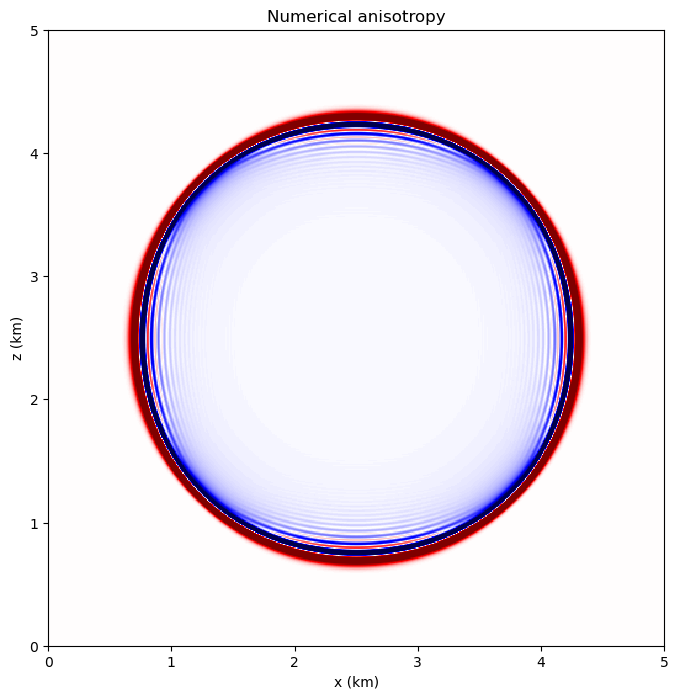

In [17]:
# Plot last pressure wavefield snapshot at Tmax = 0.8 s
# -----------------------------------------------------
rcParams['figure.figsize'] = 8, 8 # define figure size

clip = 1e-7  # image clipping
extent = [0.0, xmax/1000, 0.0, zmax/1000]

# Plot wavefield snapshot at tmax = 0.8 s
plt.imshow(p.T,interpolation='none',cmap='seismic',vmin=-clip,vmax=clip,extent=extent)
plt.title('Numerical anisotropy')
plt.xlabel('x (km)')
plt.ylabel('z (km)')
plt.show()

显然，每个最小波长 $N_\lambda = 1.5$ 格点的空间离散化会导致建模结果受到频散的显著影响。然而，注意频散是方向相关的。最大频散与主笛卡尔坐标轴重合，而频散在与主轴成45°角时达到最小。 这个问题被称为 **数值各向异性** 可以用数值相速度的角度依赖性来解释.

## 我们学习到:

* 二维声波方程有限差分近似的CFL准则的von Neumann分析估计。
* 二维数值有限差分模拟验证CFL准则和网格频散准则。
* 注意数值各向异性对有限差分建模结果的影响。